In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [7]:
all_offline_networks = pd.read_csv("../data/offline_social_networks.csv")
all_offline_networks.head(3)

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,contact,contact,274,28244,206.16,460.93,50.52,2.49,-0.05,0.90,4,1.0,Undirected,Unipartite,NaN,weight time,153600,large
1,copenhagen,fb_friends,800,6429,16.07,13.38,30.19,8.18,0.18,0.24,7,1.0,Undirected,Unipartite,id female,NaN,36864,large
2,copenhagen,bt,692,2426279,7012.37,4950.73,281.14,17.83,0.14,0.71,5,1.0,Undirected,Unipartite,id female,timestamp rssi,7549747,large


In [8]:
df = pd.read_csv("results/structural_measures_small_offline.csv")
df = df.merge(all_online_networks, on="name") # merge with properties from netzschleuder

In [9]:
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    mask = np.triu(np.ones_like(df, dtype=bool))
    sns.heatmap(df, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.show()

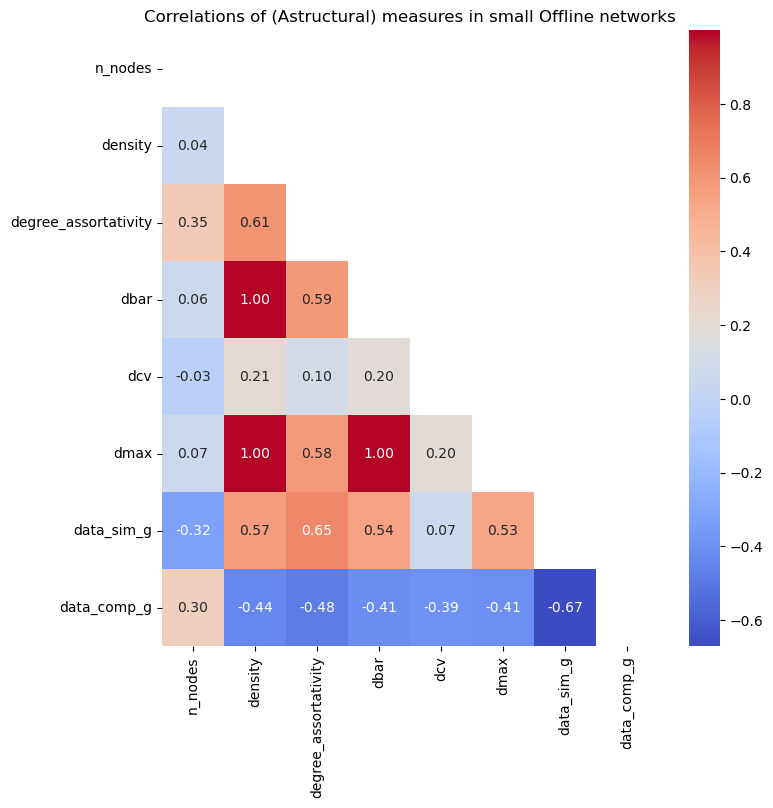

In [11]:
plot_correlation_matrix(df[["n_nodes", "density", "degree_assortativity", "dbar", "dcv", "dmax", "data_sim_g", "data_comp_g"]].corr(), "Correlations of (structural) measures in small Offline networks")


Text(0.5, 1.0, 'Global complementarity of small offline networks, data vs. null model')

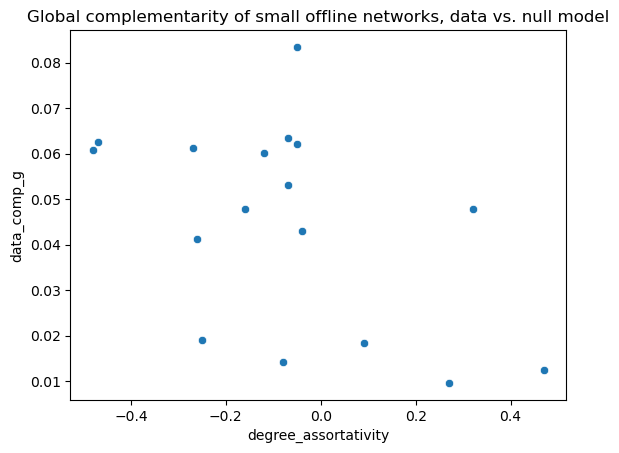

In [12]:
sns.scatterplot(data=df, x="degree_assortativity", y="data_comp_g")
plt.title("Global complementarity of small offline networks, data vs. null model")

Text(0.5, 1.0, 'Similarity vs. complementarity of small offline networks, data')

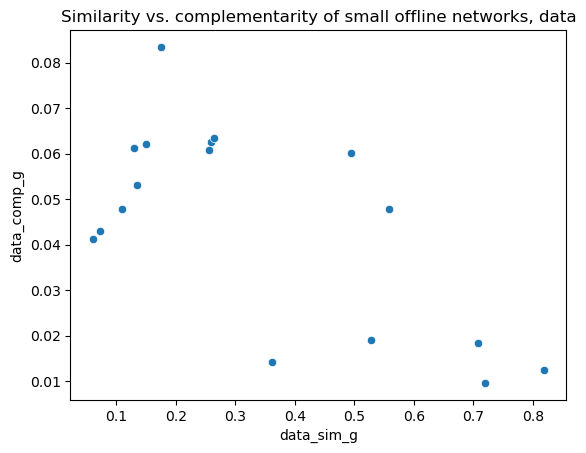

In [13]:
sns.scatterplot(data=df, x="data_sim_g", y="data_comp_g")
plt.title("Similarity vs. complementarity of small offline networks, data")

/Users/keisuke/opt/anaconda3/envs/Network_Science/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of small offline networks')

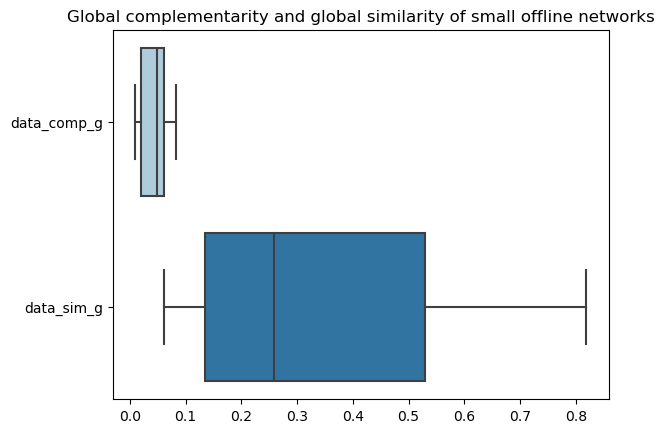

In [14]:
sns.boxplot(data=df[["data_comp_g", "data_sim_g"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of small offline networks")

/Users/keisuke/opt/anaconda3/envs/Network_Science/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of small offline networks')

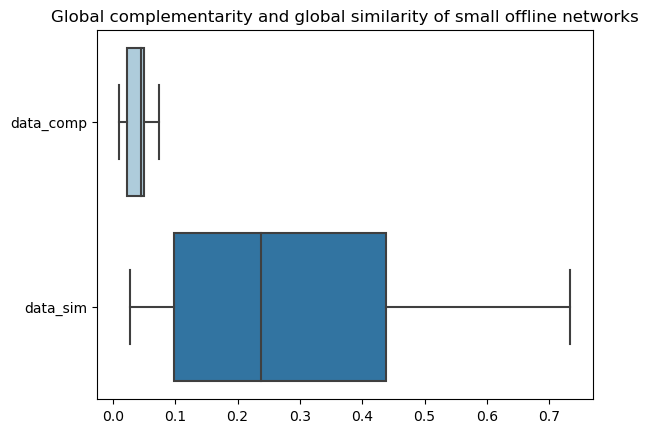

In [15]:
sns.boxplot(data=df[["data_comp", "data_sim"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of small offline networks")

/Users/keisuke/opt/anaconda3/envs/Network_Science/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of small offline networks')

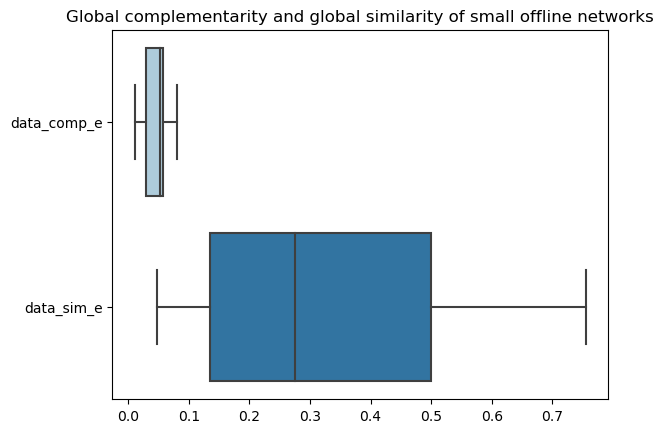

In [18]:
sns.boxplot(data=df[["data_comp_e", "data_sim_e"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of small offline networks")

In [17]:
df[df["data_sim_g"] < 0.1]

,Unnamed: 0,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
8,0,0,1,NaN,friendship-15,120,1.0,0.041317,4.916667,0.731725,...,-0.04,0.07,7,1.0,Undirected,Unipartite,name,NaN,6144,small
12,0,0,1,NaN,health-advice_15,117,1.0,0.030946,3.589744,1.339776,...,-0.26,0.06,8,1.0,Undirected,Unipartite,name,NaN,6144,small


In [19]:
df[df["data_sim_g"] > 0.35]


,Unnamed: 0,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,0,0,1,NaN,terrorists_911,62,1.0,0.080381,4.903226,0.815551,...,-0.08,0.36,5,1.0,Undirected,Unipartite,id name group,NaN,2048,small
1,0,0,1,NaN,sp_hospital,75,1.0,11.684324,864.640000,1.106573,...,0.09,0.75,3,1.0,Undirected,Unipartite,id status,time,101376,small
2,0,0,1,NaN,november17,22,1.0,0.285714,6.000000,0.596708,...,-0.25,0.53,4,1.0,Undirected,Unipartite,name Role Faction Resources,NaN,1024,small
3,0,0,1,NaN,intervals,113,1.0,0.347029,38.867257,0.472128,...,-0.12,0.50,3,1.0,Undirected,Unipartite,id,intervals,74752,small
4,0,0,1,NaN,contacts,113,1.0,3.289823,368.460177,0.876588,...,0.32,0.55,3,1.0,Undirected,Unipartite,id,time,76800,small
7,0,0,1,NaN,reality_mining,96,1.0,238.246491,22633.416667,0.963817,...,0.47,0.84,3,1.0,Undirected,Unipartite,NaN,weight time,2097152,small
16,0,0,1,NaN,sp_kenyan_households,47,1.0,30.197040,1389.063830,0.884969,...,0.27,0.74,3,1.0,Undirected,Unipartite,id house age sex,duration day hour,51200,small


In [20]:
df[df["data_sim_g"] < df["data_comp_g"]] # only in the bipartite networks the complementarity was higher

,Unnamed: 0,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut


Text(0, 0.5, 'Density')

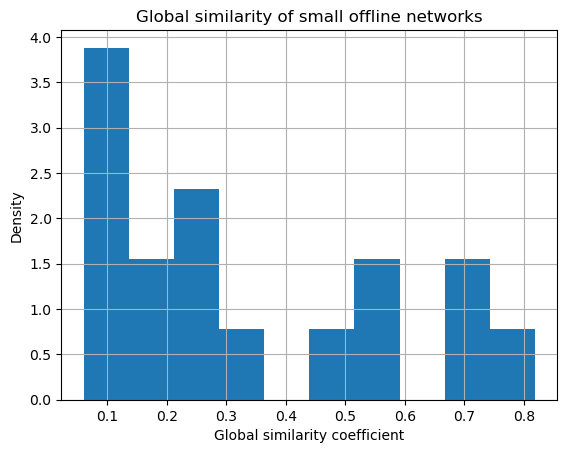

In [21]:
df["data_sim_g"].hist(density=True, bins=10)
plt.title("Global similarity of small offline networks")
plt.xlabel("Global similarity coefficient")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

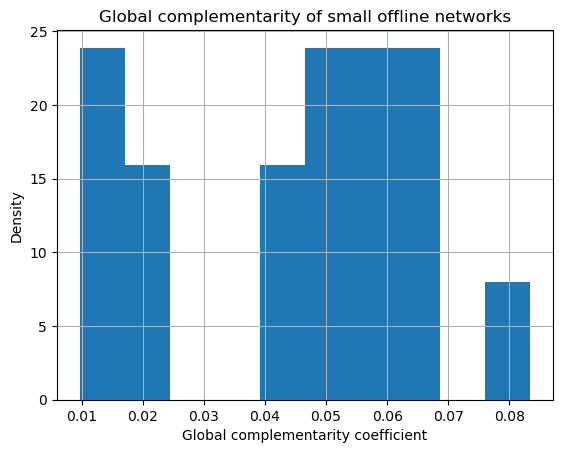

In [22]:
df["data_comp_g"].hist(density=True, bins=10)
plt.title("Global complementarity of small offline networks")
plt.xlabel("Global complementarity coefficient")
plt.ylabel("Density")